<a href="https://colab.research.google.com/github/Dwagga/LIA_ResNet_IBU_BZN/blob/main/Report_on_BZC_vs_IBU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
        <tr>
        <img src='https://drive.google.com/uc?export=view&id=1NqKV8JgAW4G4FPRNy1fHcsxCGwLsyUX0'width=500px>
        </tr>
</table>

# Report on IBU / BZC mixtures

Authors: David Méndez Merino & Alfonso Rodríguez-Patón (LIA Group).<BR>
Date: 21/09/2021.

##Abstract 

The task proposed in our last meeting was to study how to classify mixtures of the substances Ibuprofen and Benzocaine according to the Raman spectra of each mixture.

We have developed a ResNet model able to classify mixtures with different concentrations of IBU and BZC. This report presents the visualization of the data, preprocessing, model building and evaluation of model loss and accuracy. Our previous model (able to classify VIO-DV-PDV molecules) has been used with the present data, however, this architecture is not powerful enough to achieve excellent results for the current task. This report also provides a comparison between both models (previous one vs ResNet model). 

We can conclude that convolutional neural networks (specifically ResNet models) are a more powerful architecture to find patterns in Raman spectra. The evaluation of the ResNet model shows a 100% accuracy in classifying the 6 different concentrations of IBU-BZC substances.


##Introduction 

¿What is a ResNet model?
Deep learning models are composed of layers that perform different operations as the data goes through them. There are different types of layers (operations) and, depending on their distribution, several model architectures can be created. Some model architectures are more appropriate for specific classes of problems. For example, convolutional neural networks (CNNs) are commonly used for classification and pattern detection on images. In our research, we have noticed that convolutional neural networks have been used to study Raman spectra over the last years. This AI architecture has presented excellent results for spectra analysis since a Raman spectrum is a 1-Dimensional image. Figure 1 shows a CNN model.
<br><br>
<table>
        <tr>
        <img src='https://drive.google.com/uc?export=view&id=16E3Dnu_CgjFxBFl8BlwUPHeVAhxbZBpa'width=500px>
        </tr>
</table>
<br>
<center>Figure 1. Example of Convolutional Neural Network architecture.</center>

<br>ResNets are a modern type of CNN that allows building deeper and more efficient models with less computational capacity. These networks are built by concatenating several residual blocks that propagate what they have learned to subsequent blocks. Figure 2 displays a graphic representation of a ResNet architecture:
<br><br>
<table>
        <tr>
        <img src='https://drive.google.com/uc?export=view&id=14PGWvZthZnM5LFWwGQOW04O6pXOUxGfA'width=500px>
        </tr>
</table>
<br>
<center>Figure 2. Example of ResNet architecture.</center>

<br>Common operations in convolutional neural networks:

**Convolution:** This operation focuses on extracting/preserving important features from the input.<br>

**Max-Pooling:** It helps to preserve the essential features when image size is reduced.<br>

**ReLU:** It is the activation function that determines the activation of a neuron. <br>

**BN (Batch-Normalization):**  Technique used to increase the stability of a neural network. It helps our neural network to work with better speed and provide more efficient results.
<br><br>

##Materials and methods

The data available for this analysis consists of a data set provided by UVIGO with a total of 180 samples of spectra from several mixtures of these two substances. There are 30 samples of each mixture:

*   0% IBU - 100% BZC
*   20% IBU - 80% BZC
*   40% IBU - 60% BZC
*   60% IBU - 40% BZC
*   80% IBU - 20% BZC
*   100% IBU - 0% BZC

Each sample is composed of a one-dimensional array of 1023 positions representing the spectrum range from 1 nms to 2807 nms.

The development of the required functions and methods exposed on this report have been implemented using the Google Colab platform. Imported and used python libraries are tensorflow, matplotlib, numpy, pandas, sklearn, among others.
<br><br>

##Contents

*   **SECTION I:** Data loading and visualization.

In this section we load, visualize and prepare the data for further operations. 

*   **SECTION II:** Data preprocessing.

The preprocessing has consisted of two operations. In the first, we have cut out the spectra from their original Raman shift (1 nms - 2800 nms) to a Raman shift of 300 nms - 1800 nms. In this way, we simplify the data and work only with the important part. The second preprocessing operation is the baseline correction technique. 

*   **SECTION III:** Building a multilayer neural network.

In order to find a reference of the complexity of our problem, we have tried to solve it with a multilayer neural network, the same network used in our previous analysis (VIO-DV-PDV classification). However, as we expected, the current task has a higher grade of complexity and this AI architecture is not powerful enough to classify the IBU-BZC mixtures.

*   **SECTION IV:** Building a ResNet model. 

In this section, we build a convolutional neural network (ResNet model) to see if this architecture is able to solve our problem. Convolutions, Max-Pooling, Batch-Norm and ReLU are the main operations that will find the unique pattern for each class in our data.

*   **SECTION V:** Evaluation of the ResNet model. 

Here we evaluate the performance of the ResNet model by looking at its evolution throughout the training and testing processes.  

*   **SECTION VI:** Conclusions. 

The conclusions section draws details about the comparison between the two AI structures built in this analysis and how the ResNet model has outperformed the multilayer neural network in this task.
<br><br>

##**SECTION I:** Data loading and visualization.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import csv
import matplotlib
import glob
import os

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical 

import PIL
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import itertools
!pip install tensorflow-addons
from tensorflow_addons.optimizers import CyclicalLearningRate
from tensorflow.keras.callbacks import ModelCheckpoint

matplotlib.style.use("seaborn-poster")

     |████████████████████████████████| 1.1 MB 30.2 MB/s 


In [ ]:
print(tf.config.list_physical_devices('GPU'))

[]


First 5 rows of the dataset:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/BZC vs IBU - FULL DATA.csv").T
display(df.head(5))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
RS,1.926,5.804,9.678,13.549,17.417,21.281,25.143,29.002,32.858,36.711,40.56,44.407,48.251,52.091,55.929,59.763,63.595,67.424,71.249,75.072,78.891,82.708,86.522,90.332,94.14,97.944,101.746,105.545,109.341,113.133,116.923,120.71,124.494,128.275,132.053,135.828,139.60,143.369,147.135,150.898,...,2731.912,2733.881,2735.849,2737.816,2739.781,2741.746,2743.709,2745.671,2747.632,2749.591,2751.549,2753.506,2755.462,2757.417,2759.371,2761.323,2763.274,2765.224,2767.173,2769.12,2771.067,2773.012,2774.956,2776.899,2778.84,2780.781,2782.72,2784.658,2786.595,2788.531,2790.465,2792.399,2794.331,2796.262,2798.192,2800.12,2802.048,2803.974,2805.899,2807.823
IBU 0-100 BZC,34124.000,9625.000,1354.000,539.000,397.000,316.000,281.000,249.000,221.000,204.000,171.00,151.000,159.000,148.000,135.000,155.000,124.000,148.000,151.000,187.000,158.000,149.000,154.000,160.000,171.00,172.000,187.000,192.000,197.000,224.000,240.000,271.00,296.000,351.000,376.000,465.000,560.00,636.000,804.000,1011.000,...,2686.000,2641.000,2636.000,2614.000,2553.000,2552.000,2515.000,2482.000,2444.000,2461.000,2446.000,2441.000,2443.000,2435.000,2438.000,2416.000,2419.000,2445.000,2735.000,2436.00,2488.000,2502.000,2498.000,2525.000,2484.00,2501.000,2507.00,2524.000,2526.000,2572.000,2542.000,2583.000,2631.000,2687.000,2669.000,2730.00,2743.000,0.000,4.000,2.000
IBU 0-100 BZC.1,33969.750,9623.750,1354.750,556.750,400.750,339.750,274.750,263.750,226.750,194.750,167.75,150.750,137.750,149.750,122.750,137.750,126.750,149.750,136.750,184.750,155.750,141.750,146.750,160.750,163.75,179.750,200.750,187.750,204.750,214.750,239.750,265.75,307.750,340.750,397.750,465.750,546.75,652.750,814.750,1023.750,...,2656.750,2644.750,2672.750,2609.750,2603.750,2568.750,2565.750,2495.750,2476.750,2480.750,2477.750,2489.750,2408.750,2433.750,2422.750,2452.750,2471.750,2431.750,2778.750,2485.75,2506.750,2530.750,2540.750,2521.750,2507.75,2527.750,2493.75,2513.750,2534.750,2568.750,2592.750,2597.750,2682.750,2673.750,2713.750,2670.75,2805.750,1.750,1.750,-2.250
IBU 0-100 BZC.2,34462.380,9741.380,1358.380,560.380,396.380,335.380,290.380,266.380,219.380,211.380,161.38,156.380,157.380,127.380,130.380,151.380,138.380,141.380,149.380,207.380,152.380,150.380,155.380,171.380,184.38,177.380,198.380,200.380,194.380,247.380,235.380,256.38,293.380,353.380,371.380,470.380,561.38,658.380,804.380,1022.380,...,2710.380,2683.380,2685.380,2642.380,2650.380,2597.380,2572.380,2537.380,2540.380,2486.380,2491.380,2461.380,2447.380,2452.380,2514.380,2465.380,2470.380,2477.380,2767.380,2500.38,2535.380,2522.380,2514.380,2563.380,2508.38,2520.380,2517.38,2535.380,2548.380,2595.380,2597.380,2649.380,2663.380,2723.380,2690.380,2741.38,2804.380,0.380,3.380,0.380
IBU 0-100 BZC.3,34254.000,9793.000,1367.000,561.000,398.000,337.000,290.000,252.000,221.000,204.000,176.00,140.000,160.000,158.000,131.000,148.000,130.000,136.000,152.000,202.000,151.000,168.000,151.000,163.000,183.00,167.000,170.000,192.000,187.000,240.000,226.000,265.00,303.000,347.000,386.000,481.000,580.00,661.000,819.000,1024.000,...,2731.000,2679.000,2716.000,2708.000,2616.000,2616.000,2606.000,2518.000,2532.000,2496.000,2477.000,2489.000,2486.000,2477.000,2454.000,2453.000,2495.000,2515.000,2779.000,2505.00,2537.000,2558.000,2512.000,2568.000,2528.00,2589.000,2572.00,2566.000,2564.000,2619.000,2620.000,2660.000,2712.000,2743.000,2732.000,2766.00,2769.000,3.000,1.000,1.000


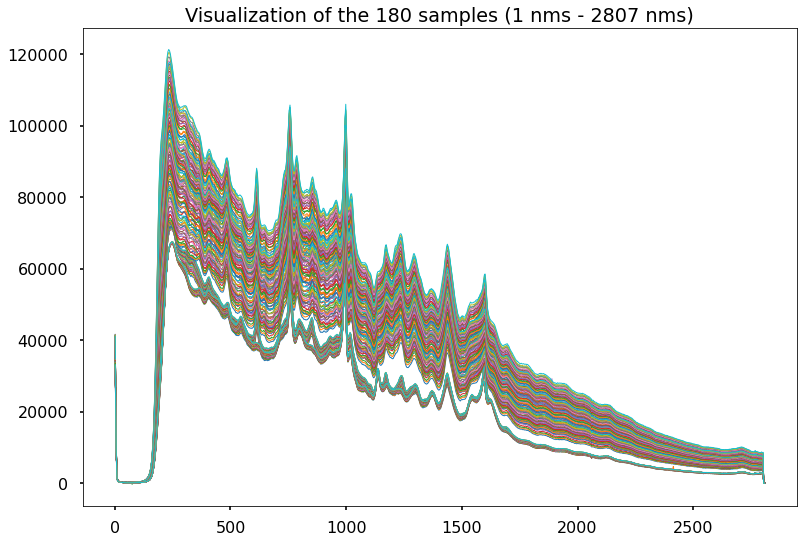

In [ ]:
df = df.reset_index(drop=True)
jump = True
for row in df.index:
  if jump == True:
    jump = False
  else:
    y=df.iloc[row,:]
    plt.plot(df.iloc[0,:],y,linewidth=1)
plt.title("Visualization of the 180 samples (1 nms - 2807 nms)")
plt.show()

##**SECTION II:** Data preprocessing.

### Simplification of the data

We have decided to simplify the data by cutting out some parts of the Raman shift that we consider less relevant. From now on, we will work with the Raman shift of 300 nms-1800 nms: 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/BZC vs IBU - FULL DATA.csv").T
df = df.drop(df.iloc[:, 570:], axis = 1)
df = df.drop(df.iloc[:, 0:80], axis = 1)

wavelength = df.iloc[0,:]

In [ ]:
df_categories = pd.DataFrame(df.index)
df_categories = df_categories.drop(0).reset_index(drop=True)
display(df_categories)

df = df.drop('RS').reset_index(drop=True)
display(df)

,0
0,IBU 0-100 BZC
1,IBU 0-100 BZC.1
2,IBU 0-100 BZC.2
3,IBU 0-100 BZC.3
4,IBU 0-100 BZC.4
...,...
175,IBU 100-0 BZC.25
176,IBU 100-0 BZC.26
177,IBU 100-0 BZC.27
178,IBU 100-0 BZC.28


,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,...,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569
0,60707.00,60392.00,59935.00,59334.00,58862.00,58372.00,58335.00,57799.00,58153.00,57687.00,57659.00,57427.00,56753.00,56280.00,55938.00,55651.00,55116.00,54421.00,54115.00,53532.00,52768.00,52288.00,51800.00,51303.00,51048.00,51535.00,52100.00,52637.00,53031.00,53015.00,52795.00,52191.00,51433.00,50717.00,50417.00,49989.00,49652.00,49274.00,49024.00,48788.00,...,14070.00,13833.00,13712.00,13498.00,13210.00,13050.00,12917.00,12826.00,12524.00,12307.00,12273.00,12091.00,11976.00,11846.00,11754.00,11550.00,11449.00,11419.00,11248.00,11185.00,11161.00,11180.00,11159.00,11102.00,11049.00,11012.00,11001.00,10971.00,10950.00,10928.00,10895.00,10884.00,10807.00,10729.00,10704.00,10679.00,10610.00,10583.00,10358.00,10313.00
1,61012.75,60836.75,60393.75,59751.75,59246.75,58575.75,58751.75,58494.75,58405.75,58194.75,58192.75,57726.75,57297.75,56853.75,56405.75,55926.75,55350.75,54900.75,54485.75,53873.75,53220.75,52638.75,51953.75,51542.75,51600.75,51784.75,52452.75,52954.75,53581.75,53426.75,53176.75,52277.75,51960.75,51130.75,50576.75,50428.75,49974.75,49768.75,49424.75,49120.75,...,14214.75,13996.75,13851.75,13532.75,13262.75,13202.75,13040.75,12877.75,12639.75,12579.75,12310.75,12180.75,12051.75,11916.75,11800.75,11666.75,11640.75,11445.75,11403.75,11362.75,11266.75,11249.75,11235.75,11175.75,11096.75,11164.75,11007.75,10991.75,10935.75,10950.75,11045.75,10936.75,10891.75,10845.75,10752.75,10771.75,10689.75,10619.75,10449.75,10423.75
2,61182.38,61044.38,60618.38,60041.38,59726.38,59143.38,58732.38,58705.38,58736.38,58685.38,58489.38,58133.38,57935.38,57258.38,56810.38,56252.38,55880.38,55530.38,54781.38,54257.38,53587.38,52863.38,52477.38,52054.38,52062.38,52237.38,52808.38,53228.38,53736.38,53923.38,53302.38,52876.38,51827.38,51535.38,50886.38,50498.38,50307.38,49834.38,49585.38,49316.38,...,14264.38,14097.38,13966.38,13697.38,13433.38,13345.38,13057.38,12888.38,12724.38,12607.38,12410.38,12277.38,12092.38,11899.38,11950.38,11750.38,11581.38,11539.38,11457.38,11432.38,11306.38,11319.38,11183.38,11250.38,11241.38,11144.38,11168.38,11131.38,11075.38,11012.38,11077.38,11024.38,11006.38,10915.38,10895.38,10833.38,10791.38,10598.38,10531.38,10429.38
3,61512.00,61414.00,60962.00,60388.00,60089.00,59506.00,59201.00,59264.00,59398.00,58990.00,59054.00,58701.00,58341.00,57681.00,57240.00,56741.00,56230.00,55772.00,55345.00,54586.00,53885.00,53261.00,52838.00,52495.00,52309.00,52445.00,53104.00,53874.00,54190.00,54152.00,53755.00,53066.00,52488.00,51666.00,51213.00,51099.00,50637.00,50336.00,49958.00,49743.00,...,14426.00,14291.00,14115.00,13823.00,13541.00,13349.00,13153.00,12961.00,12700.00,12727.00,12516.00,12359.00,12129.00,12044.00,11867.00,11815.00,11771.00,11615.00,11528.00,11498.00,11417.00,11362.00,11309.00,11304.00,11314.00,11212.00,11197.00,11154.00,11176.00,11123.00,11062.00,11046.00,10993.00,10962.00,10831.00,10910.00,10801.00,10672.00,10594.00,10492.00
4,61917.38,61470.38,61264.38,60788.38,60218.38,59762.38,59627.38,59418.38,59585.38,59333.38,59326.38,58926.38,58341.38,57854.38,57322.38,57034.38,56546.38,55876.38,55437.38,54895.38,54276.38,53432.38,53022.38,52514.38,52456.38,52715.38,53192.38,53715.38,54267.38,54446.38,53945.38,53301.38,52363.38,51815.38,51537.38,51132.38,50819.38,50476.38,50008.38,49723.38,...,14386.38,14279.38,14063.38,13905.38,13580.38,13425.38,13202.38,13081.38,12769.38,12704.38,12520.38,12388.38,12162.38,12018.38,11963.38,11791.38,11745.38,11580.38,11573.38,11516.38,11433.38,11338.38,11402.38,11281.38,11263.38,11212.38,11137.38,11131.38,11135.38,11196.38,11137.38,11129.38,11068.38,11022.38,10979.38,10881.38,10887.38,10699.38,10697.38,10530.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Let's visualize our data after cutting out the irrelevant parts:

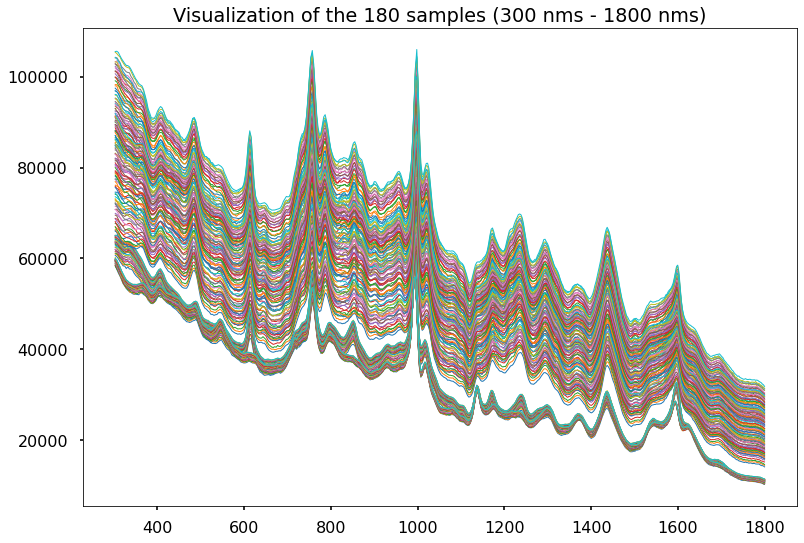

In [ ]:
for row in df.index:
  y=df.iloc[row,:]
  plt.plot(wavelength,y,linewidth=1)
plt.title("Visualization of the 180 samples (300 nms - 1800 nms)")
plt.show()

At this point, we could contemplate normalizing the data. However, for this model where all the features (intensities on each Raman shift point) are measured in the same range, we think it is not really required.

### Baseline correction

We have considered the baseline correction as a positive operation for this model. This important pre-processing technique is used to separate true spectroscopic signals from interference effects or remove background effects, stains or traces of compounds.

To make this, we will use the <b>Zhang fit method</b>:

<h5>REFERENCE: https://pypi.org/project/BaselineRemoval/</h5>

In [ ]:
!pip install BaselineRemoval #Just execute the first time

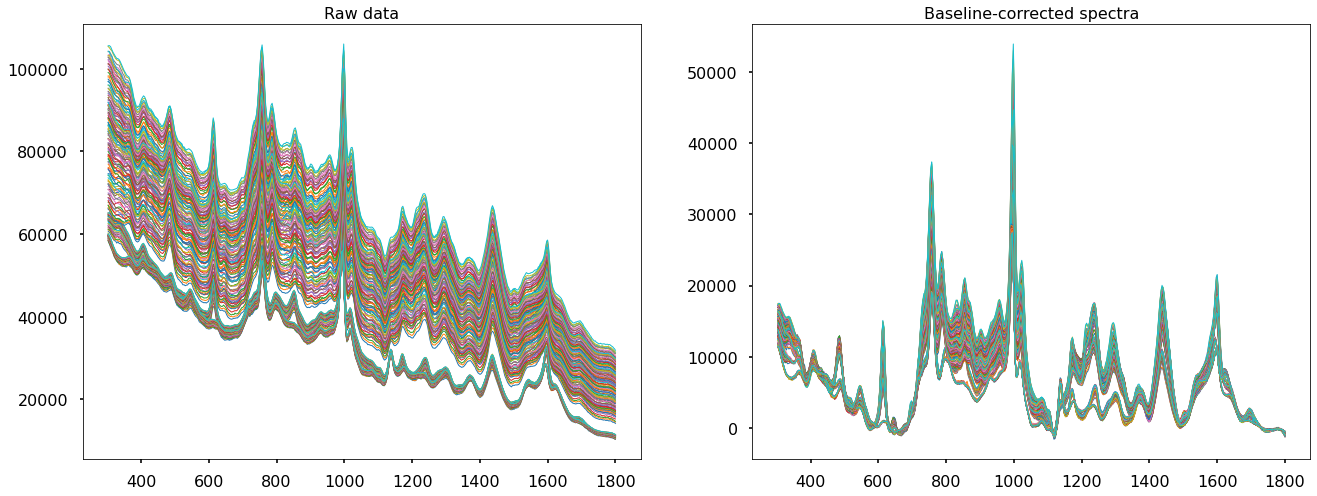

In [ ]:
from BaselineRemoval import BaselineRemoval

df_bc = pd.DataFrame() #df_vio non-spiked baseline-corrected

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,8))

for row in df.index:
    y=df.iloc[row]
    axes[0].plot(wavelength,y,linewidth=1)
    axes[0].set_title('Raw data', fontsize = 16)

for row in df.index:
    input_array=df.iloc[row] # df_vio non-spiked sperctra
    
    #Baseline correction with Zhang fit method
    baseObj=BaselineRemoval(input_array)
    Zhangfit_output=baseObj.ZhangFit()
    df_bc[row]=Zhangfit_output

    axes[1].set_title('Baseline-corrected spectra', fontsize = 16)
    axes[1].plot(wavelength,df_bc[row],linewidth=1)

df_bc = df_bc.T
plt.show()

Plotting all classes:

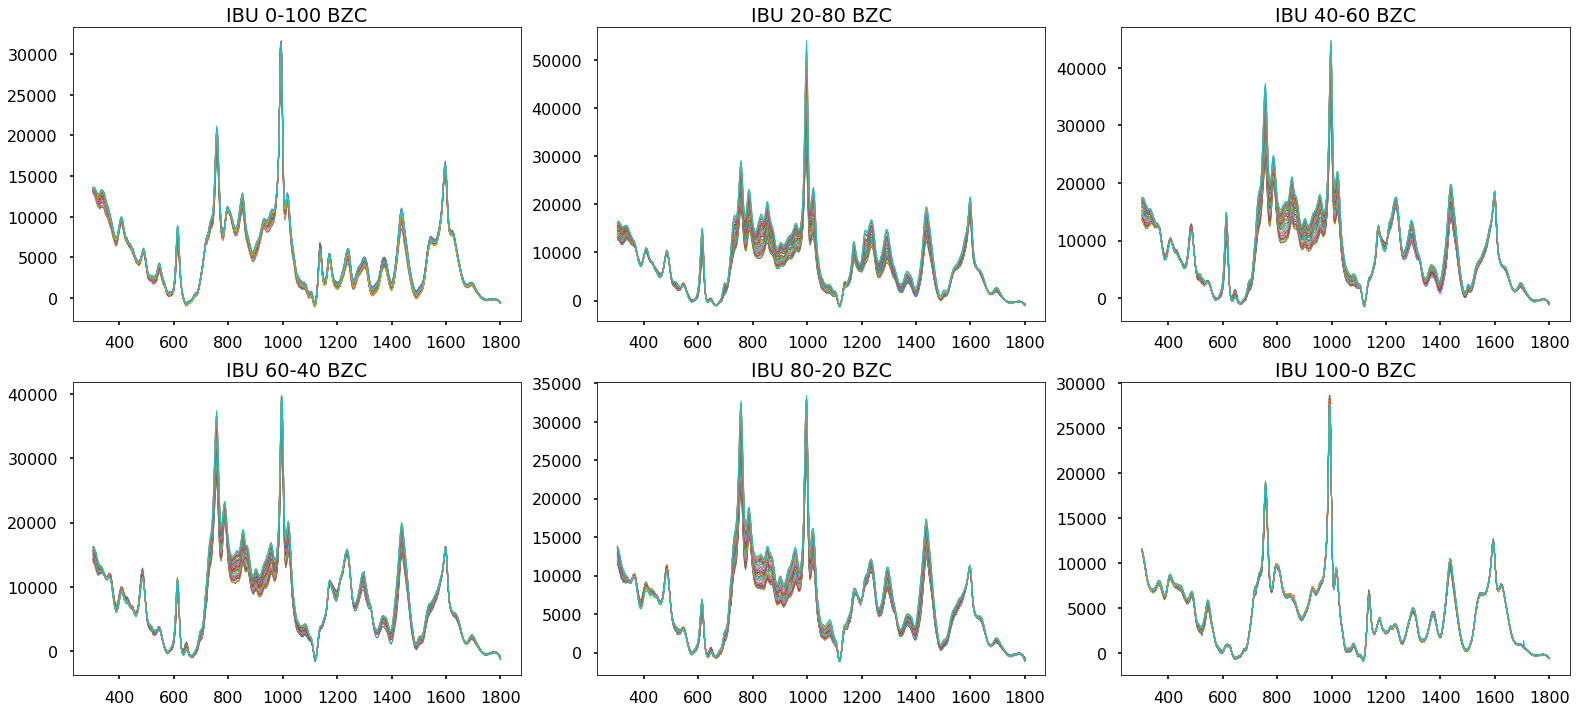

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(22,10))

for row in df_categories[df_categories[0].str.contains("IBU 0-100 BZC")].index:
  y=df_bc.iloc[row,:]
  axes[0][0].plot(wavelength,y,linewidth=1)
  axes[0][0].set_title("IBU 0-100 BZC")

for row in df_categories[df_categories[0].str.contains("IBU 20-80 BZC")].index:
  y=df_bc.iloc[row,:]
  axes[0][1].plot(wavelength,y,linewidth=1)
  axes[0][1].set_title("IBU 20-80 BZC")

for row in df_categories[df_categories[0].str.contains("IBU 40-60 BZC")].index:
  y=df_bc.iloc[row,:]
  axes[0][2].plot(wavelength,y,linewidth=1)
  axes[0][2].set_title("IBU 40-60 BZC")

for row in df_categories[df_categories[0].str.contains("IBU 60-40 BZC")].index:
  y=df_bc.iloc[row,:]
  axes[1][0].plot(wavelength,y,linewidth=1)
  axes[1][0].set_title("IBU 60-40 BZC")

for row in df_categories[df_categories[0].str.contains("IBU 80-20 BZC")].index:
  y=df_bc.iloc[row,:]
  axes[1][1].plot(wavelength,y,linewidth=1)
  axes[1][1].set_title("IBU 80-20 BZC")

for row in df_categories[df_categories[0].str.contains("IBU 100-0 BZC")].index:
  y=df_bc.iloc[row,:]
  axes[1][2].plot(wavelength,y,linewidth=1)
  axes[1][2].set_title("IBU 100-0 BZC")

figure.tight_layout()
plt.show()

##**SECTION III:** Building a multilayer neural network. 



This multilayer neural network is similar to the network we used in our last study. Let's analyse its performance for this classification problem. 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
df_categories[df_categories[0].str.contains("IBU 0-100 BZC")] = 'IBU 0-100 BZC'
df_categories[df_categories[0].str.contains("IBU 20-80 BZC")] = 'IBU 20-80 BZC'
df_categories[df_categories[0].str.contains("IBU 40-60 BZC")] = 'IBU 40-60 BZC'
df_categories[df_categories[0].str.contains("IBU 60-40 BZC")] = 'IBU 60-40 BZC'
df_categories[df_categories[0].str.contains("IBU 80-20 BZC")] = 'IBU 80-20 BZC'
df_categories[df_categories[0].str.contains("IBU 100-0 BZC")] = 'IBU 100-0 BZC'
df_categories

df.shape[1]

dic = {
    'IBU 0-100 BZC': 0,
    'IBU 20-80 BZC': 1,
    'IBU 40-60 BZC': 2,
    'IBU 60-40 BZC': 3,
    'IBU 80-20 BZC': 4,
    'IBU 100-0 BZC': 5}

df_categories['ID'] = df_categories[0].map(dic)

In [ ]:
model = Sequential() # We are using the Sequential model because our network consists of a linear stack of layers

model.add(Dense(df.shape[1], activation='relu', input_dim=df.shape[1])) # input layer which specifies the activation function and the number of input dimensions
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(6, activation='softmax')) # three nodes because there are two output classes 0(VIO), 1(DV) and 2(PDV)

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# creates arrays of independent (X) and dependent (y) variables.
x = df.values
y = df_categories['ID'].values

# splits the data into training and test datasets, with 30% of the observations in the test set.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30) #Make random training and testing subsets 
print('train_set_shape: {0}'.format(X_train.shape)) ;  print('test_set_shape: {0}'.format(X_test.shape))

# Since our target variable represents a category which has been coded as numbers 0, 1 and 2, we will have to encode it:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

history = model.fit(X_train, y_train, epochs=350)

**Training process is attached in file: "Multilayer Neural Network TRAINING PROCESS.txt"**

In [ ]:
# Evaluation of the Model Performance
# The output above shows the performance of the model on both training and test data. 

pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}\n\n'.format(scores2[1], 1 - scores2[1]))  

Accuracy on training data: 0.8095238208770752% 
 Error on training data: 0.1904761791229248
Accuracy on test data: 0.7222222089767456% 
 Error on test data: 0.2777777910232544




Confusion matrix
[[10  0  0  0  0  0]
 [ 1  2  7  0  0  0]
 [ 2  0  9  0  0  0]
 [ 0  0  0  8  0  0]
 [ 3  0  0  5  2  0]
 [ 0  0  0  0  0  5]]


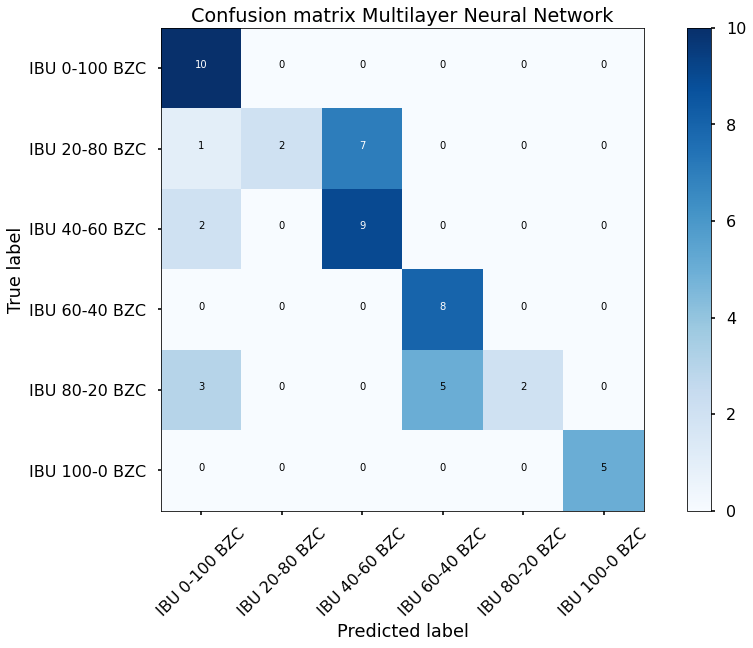

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['IBU 0-100 BZC', 'IBU 20-80 BZC', 'IBU 40-60 BZC', 'IBU 60-40 BZC', 'IBU 80-20 BZC', 'IBU 100-0 BZC'], title='Confusion matrix Multilayer Neural Network')

Very arbitrary results, each execution presents a different accuracy and loss. As a solution, we will try a more modern architecture, which uses convolutions to find unique patterns in the data: *ResNet* architecture.

##**SECTION IV:** Building a ResNet model.

Residual Neural Networks (ResNets) are convolutional neural networks. This kind of AI model presents very high accuracy in image recognition problems (we can understand a Raman spectrum as a 1-Dimensional image). Although they require a higher computational cost, this architecture is more than appropriate for our task. In fact, ResNets are the state of the art for Raman spectra classification problems.

First, we have to define some necessary functions:

In [ ]:
# Copied from https://github.com/avanwyk/tensorflow-projects/blob/master/lr-finder/lr_finder.py
# Apache License 2.0

from tensorflow.keras.callbacks import Callback

class LRFinder(Callback):
    """`Callback` that exponentially adjusts the learning rate after each training batch between `start_lr` and
    `end_lr` for a maximum number of batches: `max_step`. The loss and learning rate are recorded at each step allowing
    visually finding a good learning rate as per https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html via
    the `plot` method.
    """

    def __init__(self, start_lr: float = 1e-7, end_lr: float = 10, max_steps: int = 100, smoothing=0.9):
        super(LRFinder, self).__init__()
        self.start_lr, self.end_lr = start_lr, end_lr
        self.max_steps = max_steps
        self.smoothing = smoothing
        self.step, self.best_loss, self.avg_loss, self.lr = 0, 0, 0, 0
        self.lrs, self.losses = [], []

    def on_train_begin(self, logs=None):
        self.step, self.best_loss, self.avg_loss, self.lr = 0, 0, 0, 0
        self.lrs, self.losses = [], []

    def on_train_batch_begin(self, batch, logs=None):
        self.lr = self.exp_annealing(self.step)
        tf.keras.backend.set_value(self.model.optimizer.lr, self.lr)

    def on_train_batch_end(self, batch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        step = self.step
        if loss:
            self.avg_loss = self.smoothing * self.avg_loss + (1 - self.smoothing) * loss
            smooth_loss = self.avg_loss / (1 - self.smoothing ** (self.step + 1))
            self.losses.append(smooth_loss)
            self.lrs.append(self.lr)

            if step == 0 or loss < self.best_loss:
                self.best_loss = loss

            if smooth_loss > 4 * self.best_loss or tf.math.is_nan(smooth_loss):
                self.model.stop_training = True

        if step == self.max_steps:
            self.model.stop_training = True

        self.step += 1

    def exp_annealing(self, step):
        return self.start_lr * (self.end_lr / self.start_lr) ** (step * 1. / self.max_steps)

    def plot(self):
        fig, ax = plt.subplots(1, 1)
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate (log scale)')
        ax.set_xscale('log')
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e'))
        ax.plot(self.lrs, self.losses)

In [ ]:
def pretty_plot(history, field, fn):
  def plot(data, val_data, best_index, best_value, title):
    plt.plot(range(1, len(data)+1), data, label='train')
    plt.plot(range(1, len(data)+1), val_data, label='validation')
    if not best_index is None:
      plt.axvline(x=best_index+1, linestyle=':', c="#777777")
    if not best_value is None:
      plt.axhline(y=best_value, linestyle=':', c="#777777")
    plt.xlabel('Epoch')
    plt.ylabel(field)
    plt.xticks(range(0, len(data), 20))
    plt.title(title)
    plt.legend()
    plt.show()

  data = history.history[field]
  val_data = history.history['val_' + field]
  tail = int(0.15 * len(data))

  best_index = fn(val_data)
  best_value = val_data[best_index]

  plot(data, val_data, best_index, best_value, "{} over epochs (best {:06.4f})".format(field, best_value))
  plot(data[-tail:], val_data[-tail:], None, best_value, "{} over last {} epochs".format(field, tail))

In [ ]:
# creates arrays of independent (X) and dependent (y) variables.
x = df.values
y = df_categories['ID'].values

# splits the data into training and test datasets, with 30% of the observations in the test set.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30) #Make random training and testing subsets 
print('train_set_shape: {0}'.format(X_train.shape)) ;  print('test_set_shape: {0}'.format(X_test.shape))

# Since our target variable represents a category which has been coded as numbers 0, 1 and 2, we will have to encode it:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

train_set_shape: (126, 490)
test_set_shape: (54, 490)


Here we build the model architecture, which is mainly composed of 5 residual blocks: 

In [ ]:
def get_resnet_model(categories=6):
  def residual_block(X, kernels, stride):
    out = keras.layers.Conv1D(kernels, stride, padding='same')(X)
    out = keras.layers.ReLU()(out)
    out = keras.layers.Conv1D(kernels, stride, padding='same')(out)
    out = keras.layers.add([X, out])
    out = keras.layers.ReLU()(out)
    out = keras.layers.MaxPool1D(5, 2)(out)
    return out

  kernels = 32
  stride = 5

  inputs = keras.layers.Input([490,1])
  X = keras.layers.Conv1D(kernels, stride)(inputs)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = keras.layers.Flatten()(X)
  X = keras.layers.Dense(32, activation='relu')(X)
  X = keras.layers.Dense(32, activation='relu')(X)
  output = keras.layers.Dense(6, activation='softmax')(X)

  model = keras.Model(inputs=inputs, outputs=output)
  return model

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001)
model = get_resnet_model() 
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

lr_finder = LRFinder(start_lr=1e-7, end_lr= 1e-03, max_steps=100, smoothing=0.6)
_ = model.fit(X_train, y_train, batch_size=256, epochs=5, callbacks=[lr_finder], verbose=False)
#lr_finder.plot()

Visualization of all the model architecture and layers:

In [ ]:
resnet_model = get_resnet_model() 
resnet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 490, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 486, 32)      192         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 486, 32)      5152        conv1d_11[0][0]                  
__________________________________________________________________________________________________
re_lu_10 (ReLU)                 (None, 486, 32)      0           conv1d_12[0][0]                  
____________________________________________________________________________________________

Now, we will use the train set of data to train the model we have just created:

In [ ]:
# Set cyclical learning rate
N = X_train.shape[0]
batch_size = 23
iterations = N/batch_size
step_size= 2 * iterations

lr_schedule = CyclicalLearningRate(1e-6, 1e-3, step_size=step_size, scale_fn=lambda x: tf.pow(0.95,x))
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

save_best_weights = ModelCheckpoint(filepath="weights.hdf5", verbose=0, save_best_only=True)

resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = resnet_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                           shuffle=True, batch_size=batch_size, epochs=300, callbacks=[save_best_weights])

**Training process is attached in file: "ResNet Network TRAINING PROCESS.txt"**

Let's plot the loss and accuracy evolution along the training process:

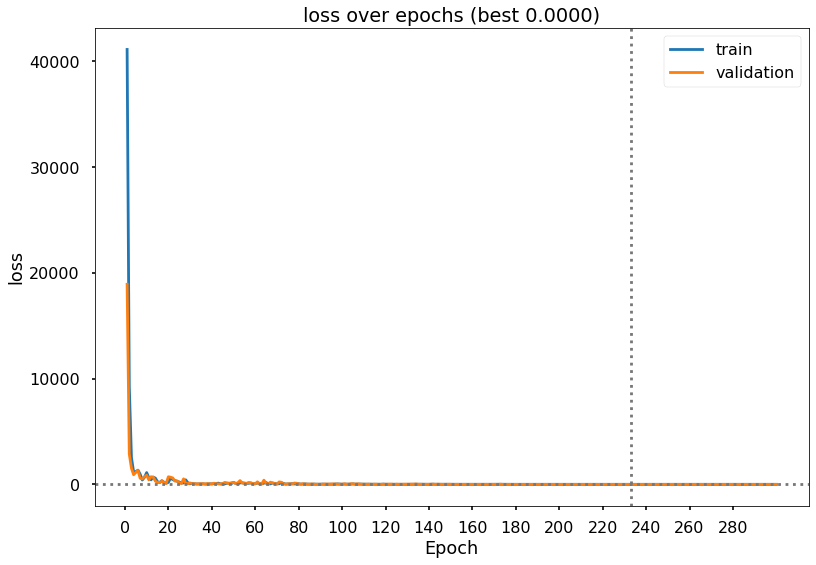

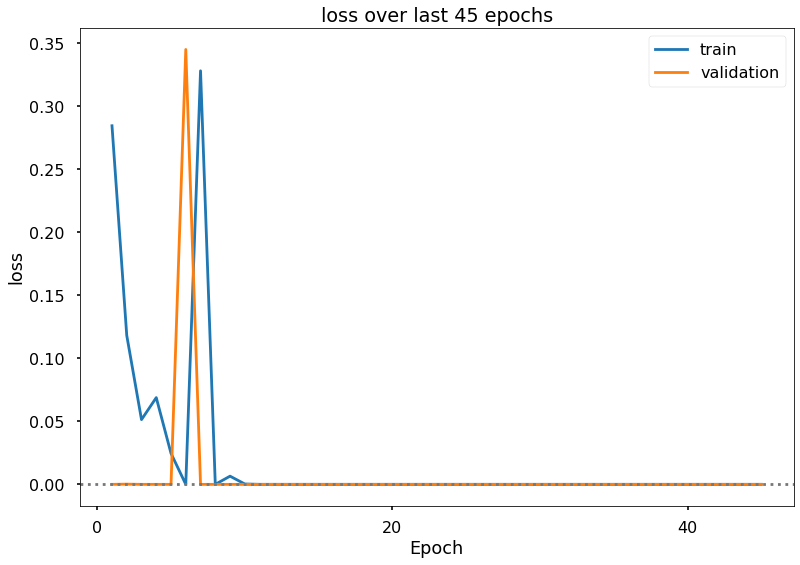

In [ ]:
pretty_plot(history, 'loss', lambda x: np.argmin(x))

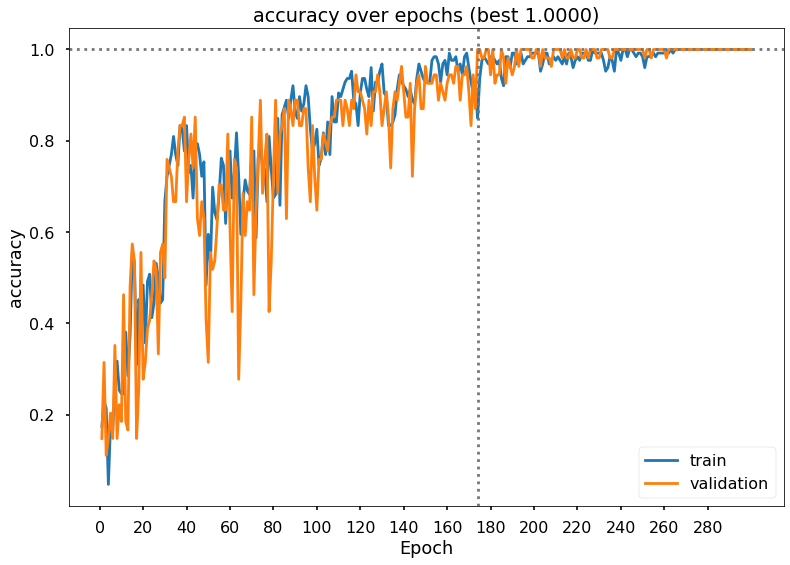

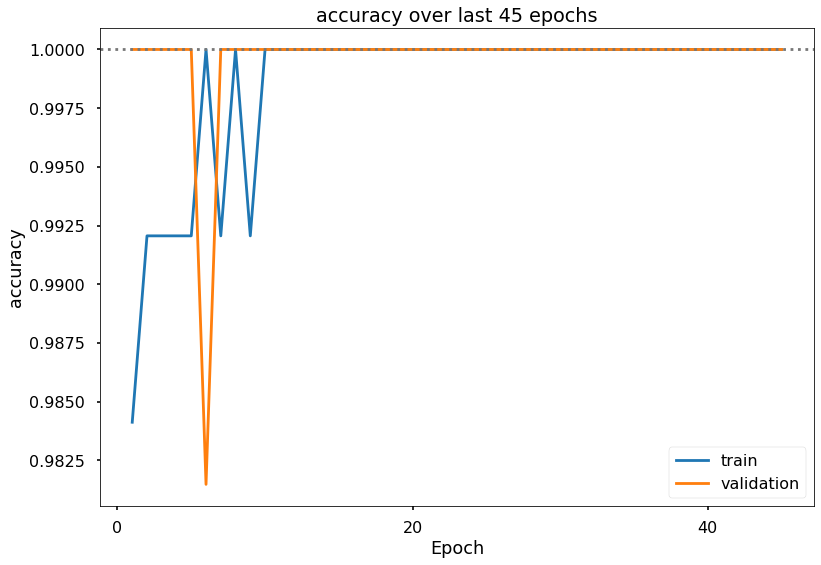

In [ ]:
pretty_plot(history, 'accuracy', lambda x: np.argmax(x))

##**SECTION V:** Evaluation of the ResNet model.

What is the accuracy of the model with the test data? 

In [ ]:
resnet_model.load_weights('weights.hdf5')
pred_train= resnet_model.predict(X_train)
scores = resnet_model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   

pred_test= resnet_model.predict(X_test)
scores2 = resnet_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}\n\n'.format(scores2[1], 1 - scores2[1]))  

Accuracy on training data: 0.976190447807312% 
 Error on training data: 0.02380955219268799
Accuracy on test data: 1.0% 
 Error on test data: 0.0




Confusion matrix
[[ 8  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 10]]


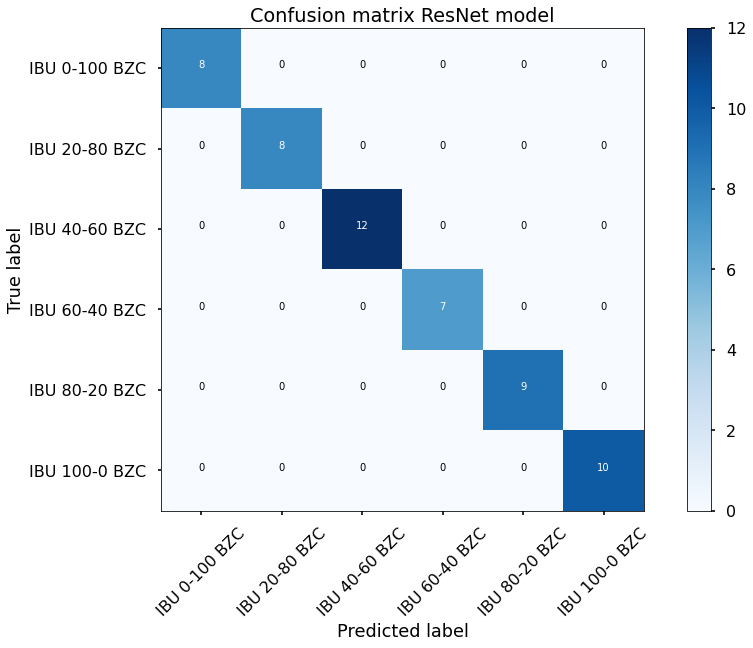

In [ ]:
y_pred = (resnet_model.predict(X_test) > 0.5).astype("int32")
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['IBU 0-100 BZC', 'IBU 20-80 BZC', 'IBU 40-60 BZC', 'IBU 60-40 BZC', 'IBU 80-20 BZC', 'IBU 100-0 BZC'], title='Confusion matrix ResNet model')

##**SECTION VI:** Conclusions

We can conclude that convolutional neural networks (specifically ResNet models) are a more powerful architecture to find patterns in Raman spectra. The evaluation of the ResNet model shows a 100% accuracy in classifying the 6 different concentrations of IBU-BZC substances.

In previous tasks, multilayer neural networks were sufficient to achieve 100% accuracy for 2 or 3 molecules differentiation problems. However, for the classification task exposed in this report, that structure has presented very arbitrary results and low-medium accuracy most of the times we have executed (~70% accuracy in the execution displayed in Section III). 

Therefore, we have implemented a ResNet model: a modern convolutional neural network able to achieve very high accuracy in image recognition problems (understanding a Raman spectrum as a vector or 1-Dimensional image). Although they require a higher computational cost, this architecture is the most appropriate for our task. In fact, ResNets are the state of the art for Raman spectra classification problems.